# About
* This is a public dataset where it can be found on [UCI Machine Learning Repository - Abalone Data Set](https://archive.ics.uci.edu/ml/datasets/Abalone).

# Target 
Predict the age of abalone from physical measurements

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

In [2]:
columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('data/abalone.data', names=columns)

In [3]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


We can get the Abalone age taking the number of rings plus 1.5. To get more information about the data set features, please read the file **data/abalone.names**.

In [4]:
df['age'] = df.rings + 1.5
df.drop(columns=['rings'], inplace=True)

In [5]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [6]:
df.shape

(4177, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# Dealing with imputation errors

In [9]:
df[df.height == 0]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [10]:
numeric_colums = df.select_dtypes(exclude='O')

imputer = KNNImputer(missing_values=0, n_neighbors=7)
df[numeric_colums.columns] = imputer.fit_transform(numeric_colums)

In [11]:
df.iloc[[1257, 3996]]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
1257,I,0.430,0.34,0.112857,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.085714,0.134,0.0575,0.0285,0.3505,7.5


In [12]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139564,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041726,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# EDA

<AxesSubplot:>

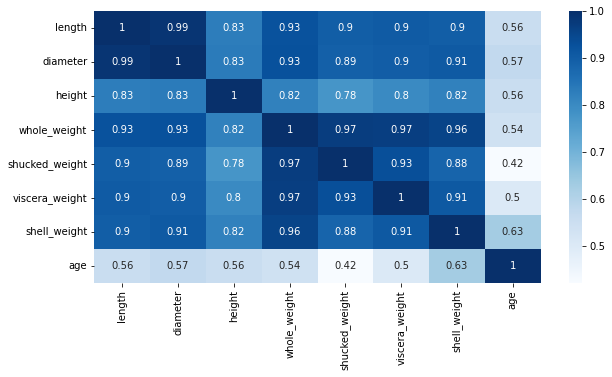

In [13]:
correlation_matrix = df.corr()


plt.figure(figsize = (10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

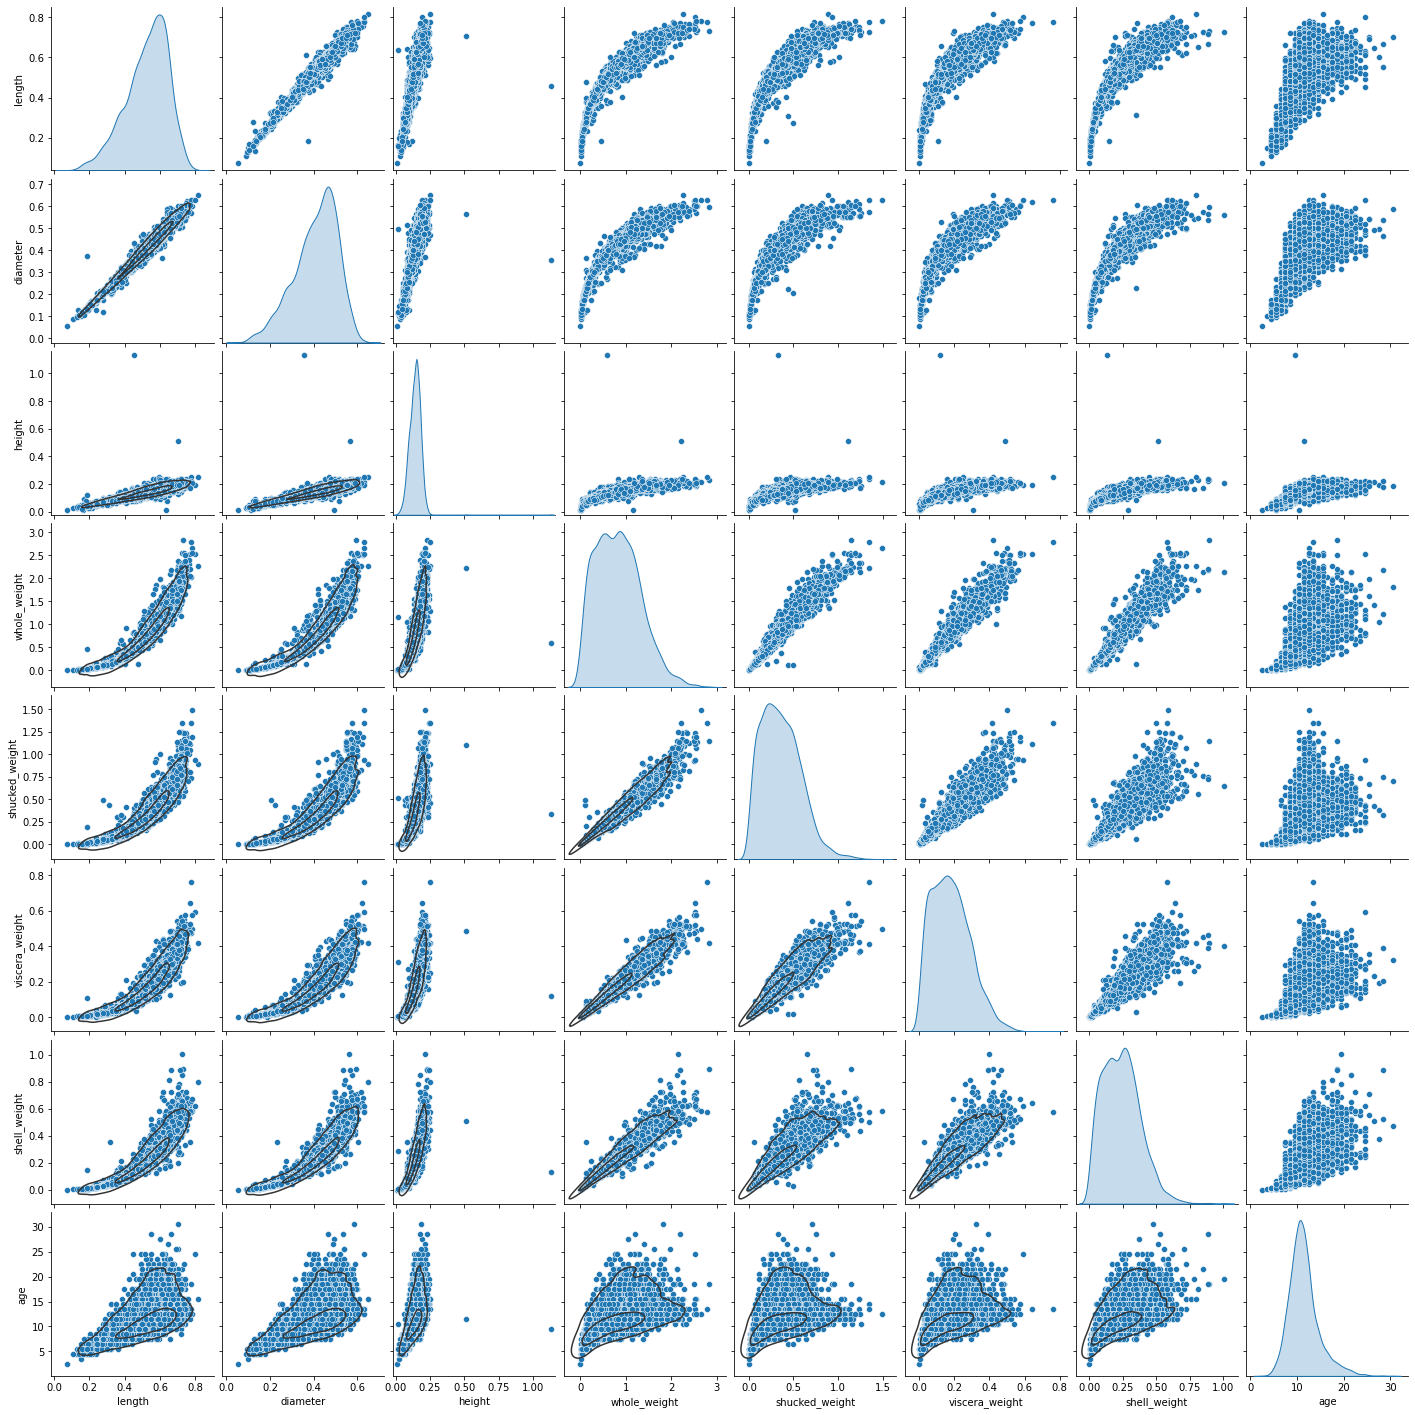

In [14]:
g = sns.pairplot(df, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=3, color=".2")


how is the distribution of our dataset?

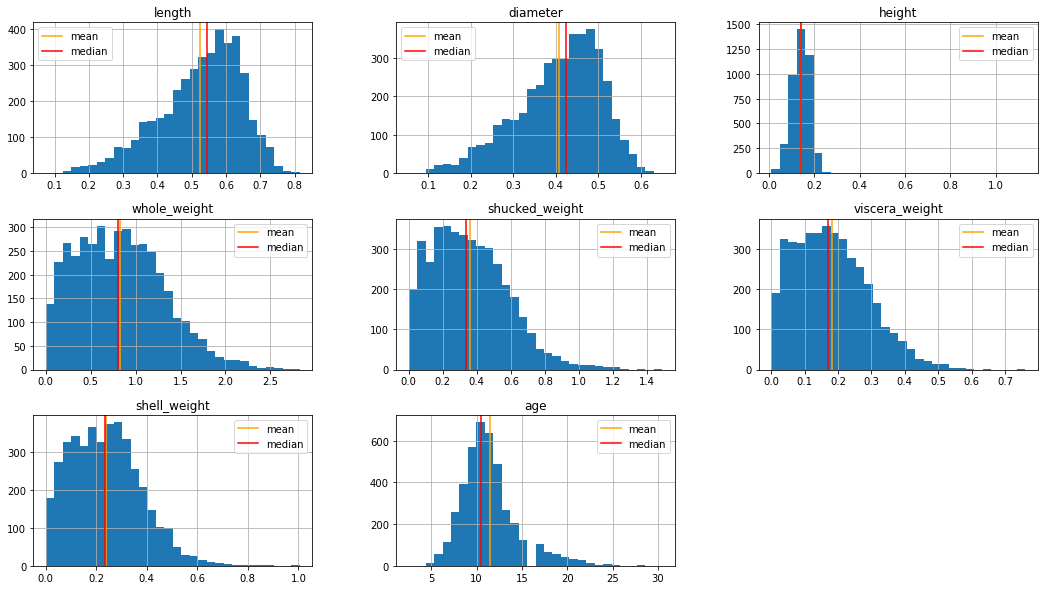

In [15]:
g = df.hist(bins=30, figsize=(18, 10))

for gi in (g):
    for gj in gi:
        if gj.get_title():
            column = df[gj.get_title()]
            gj.axvline(column.mean(), color='orange')
            gj.axvline(column.median(), color='red')
            gj.legend(['mean', 'median'])

length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
whole_weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
shucked_weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
viscera_weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
shell_weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
age                  AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

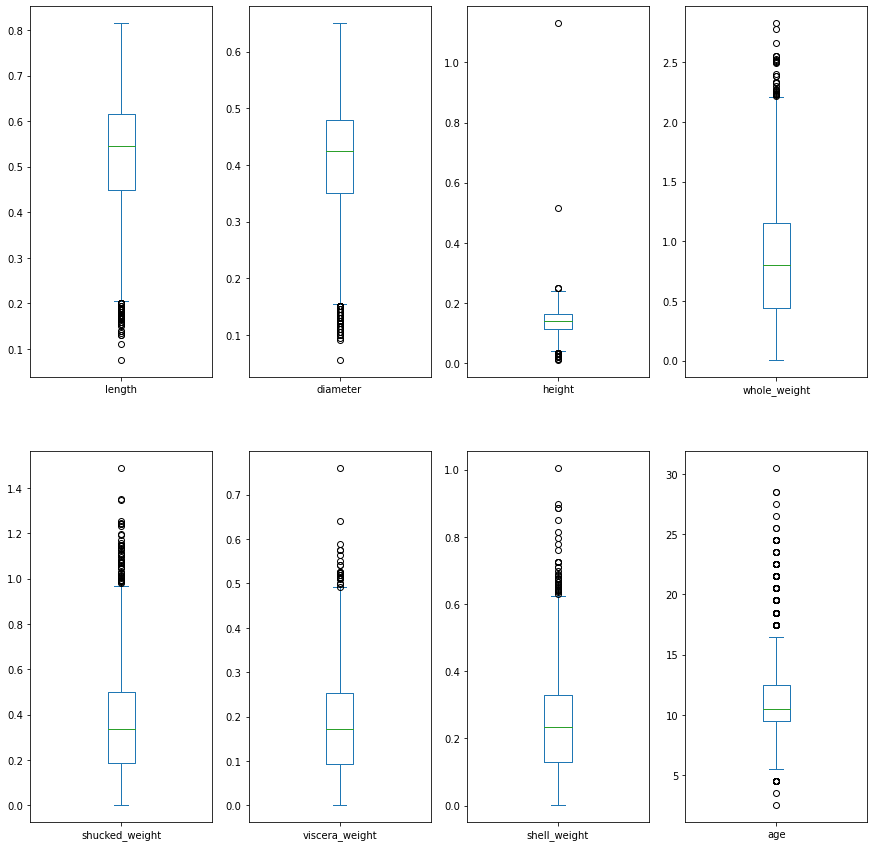

In [16]:
df.plot(kind='box', figsize=(15, 15), subplots=True, layout=(2, 4))

<AxesSubplot:xlabel='age', ylabel='Count'>

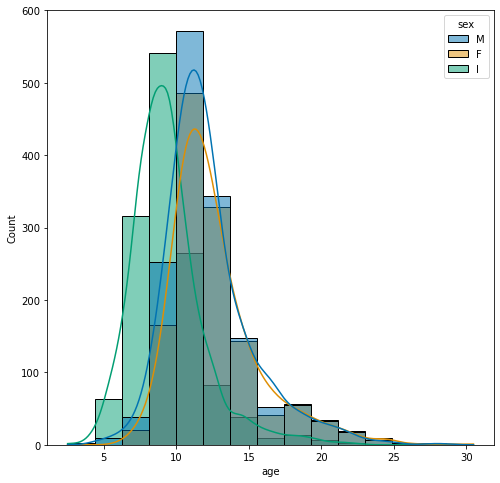

In [17]:
plt.figure(figsize=(8, 8))
sns.histplot(df, x='age', hue='sex',bins=15, kde=True, palette='colorblind')

<AxesSubplot:ylabel='sex'>

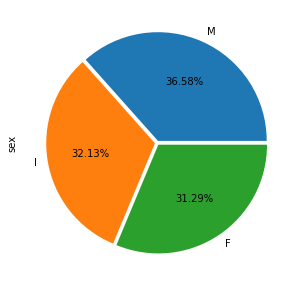

In [18]:
sex_count = df.sex.value_counts()
sex_count.plot(kind='pie', explode=[.02]*len(sex_count), figsize=(5, 5), autopct='%1.2f%%')

In [19]:
X = df.drop('age',axis='columns')
y = df.age

In [20]:
sex_dummies = pd.get_dummies(X.sex)
X =  pd.concat([sex_dummies, X], axis='columns').drop(columns=['sex'])

In [21]:
X.head()

,F,I,M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [22]:
columns_to_operate = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']

# Dealing with outliers

In [23]:
outliers =  IsolationForest(random_state=2000).fit_predict(X[columns_to_operate])

outliers_count = (outliers == -1).sum()
outliers_percentage = outliers_count / outliers.shape[0] * 100

print(f'Outliers percentage: {outliers_percentage:.2f}% - count: {outliers_count}')

Outliers percentage: 14.22% - count: 594


In [24]:
outliers_index = X[outliers == -1].index

X.drop(index=outliers_index, inplace=True)
y.drop(index=outliers_index, inplace=True)

In [25]:
X.shape

(3583, 10)

F                    AxesSubplot(0.125,0.536818;0.110714x0.343182)
I                 AxesSubplot(0.257857,0.536818;0.110714x0.343182)
M                 AxesSubplot(0.390714,0.536818;0.110714x0.343182)
length            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
diameter          AxesSubplot(0.656429,0.536818;0.110714x0.343182)
height            AxesSubplot(0.789286,0.536818;0.110714x0.343182)
whole_weight            AxesSubplot(0.125,0.125;0.110714x0.343182)
shucked_weight       AxesSubplot(0.257857,0.125;0.110714x0.343182)
viscera_weight       AxesSubplot(0.390714,0.125;0.110714x0.343182)
shell_weight         AxesSubplot(0.523571,0.125;0.110714x0.343182)
age                  AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

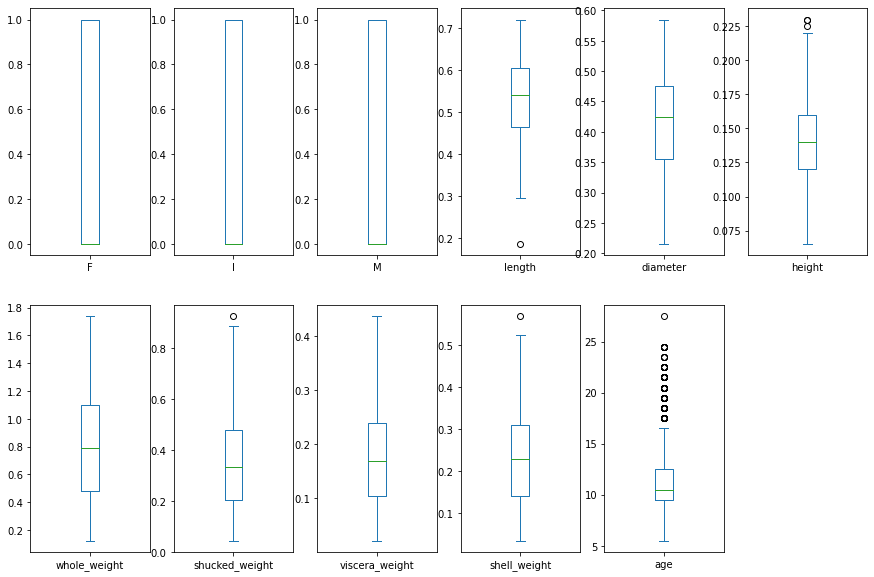

In [26]:
pd.concat([X, y], axis='columns').plot(kind='box', figsize=(15, 10), subplots=True, layout=(2, 6))

# Feature scaling

In [27]:
X[columns_to_operate] = RobustScaler().fit_transform(X[columns_to_operate])

In [28]:
X.describe()

,F,I,M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000
mean,0.316774,0.310913,0.372314,-0.077290,-0.107243,-0.005213,0.008971,0.048057,0.037857,0.005595
std,0.465283,0.462932,0.483489,0.659239,0.639803,0.760389,0.612563,0.628138,0.640950,0.639523
min,0.000000,0.000000,0.000000,-2.535714,-1.750000,-1.875000,-1.073524,-1.042381,-1.090239,-1.155096
25%,0.000000,0.000000,0.000000,-0.535714,-0.583333,-0.500000,-0.505022,-0.472498,-0.486188,-0.527326
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.464286,0.416667,0.500000,0.494978,0.527502,0.513812,0.472674
max,1.000000,1.000000,1.000000,1.285714,1.333333,2.250000,1.522700,2.140667,1.970534,2.008863


# Model Training

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=2000)

In [30]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [31]:
y_hat = model.predict(X_test)

In [32]:
print(f'''
Result:
    Score: {model.score(X_test, y_test)}
    r2_score: {r2_score(y_test, y_hat)}
    MSE: {mean_squared_error(y_test, y_hat)}
    MAE: {mean_absolute_error(y_test, y_hat)}
''')


Result:
    Score: 0.4190739806587226
    r2_score: 0.4190739806587226
    MSE: 5.280746723688005
    MAE: 1.5459284975471306

